In [1]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage.io import imread
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [47]:
# Setting the model parameters

img_size = 352
dataset_type = 'kvasir' # Options: kvasir/cvc-clinicdb/cvc-colondb/etis-laribpolypdb
learning_rate = 1e-4
seed_value = 58800

folder_path = "C:/jason/new magang/DUCK-Net/kvasir"  # Add the path to your data directory


In [5]:
images_path = []

list_files = os.listdir(os.path.join(folder_path, 'images'))
list_files = [os.path.join(folder_path, 'images', file) for file in list_files]
images_path+=list_files

masks_path = list(map(lambda x: x.replace('images', 'masks'), images_path))

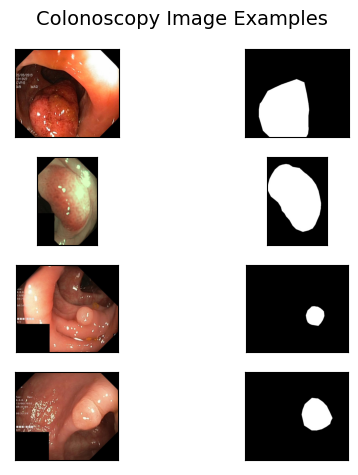

In [48]:
import random

rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols)
fig.tight_layout()
axs = axs.ravel().tolist()

list_of_samples = random.choices(images_path, k=4)
masks_of_samples = list(map(lambda x: x.replace('images', 'masks'), list_of_samples))

for idx, num in enumerate(range(0, 8, 2)):
    img = cv2.imread(list_of_samples[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[num].imshow(img)

for idx, num in enumerate(range(1, 8, 2)):
    img = cv2.imread(masks_of_samples[idx])
    axs[num].imshow(img, cmap='gray')

fig.suptitle("Colonoscopy Image Examples", fontsize=14)
plt.setp(axs, xticks=[],yticks=[])
plt.tight_layout()

In [2]:
import deeplake
import os

os.environ['ACTIVELOOP_TOKEN'] = os.getenv('ACTIVELOOP_TOKEN')

c:\jason\new magang\DUCK-Net\.venv\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.17) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [60]:
ds = deeplake.empty('hub://jasonadrianzoom/colonoscopy')

with ds:
    ds.create_tensor('images', htype='image', sample_compression='jpg')
    ds.create_tensor('masks', htype='image', sample_compression='jpg')

Your Deep Lake dataset has been successfully created!


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/jasonadrianzoom/colonoscopy


hub://jasonadrianzoom/colonoscopy loaded successfully.


In [61]:
IMAGES_PATH = os.path.join(folder_path, 'images')
MASKS_PATH = os.path.join(folder_path, 'masks')

train_ids = glob.glob(os.path.join(IMAGES_PATH, "*.jpg"))

images_to_be_loaded = len(train_ids)

In [62]:
print('Resizing training images and masks: ' + str(images_to_be_loaded))
for n, id_ in tqdm(enumerate(train_ids)):
    if n == images_to_be_loaded:
        break

    image_path = id_
    mask_path = image_path.replace("images", "masks")

    image = imread(image_path)
    mask_ = imread(mask_path)

    mask = np.zeros((img_size, img_size), dtype=np.bool_)

    pillow_image = Image.fromarray(image)

    pillow_image = pillow_image.resize((img_size, img_size))
    image = np.array(pillow_image).astype('uint8')

    pillow_mask = Image.fromarray(mask_)
    pillow_mask = pillow_mask.resize((img_size, img_size), resample=Image.LANCZOS)
    mask_ = np.array(pillow_mask)
    mask_ = np.mean(mask_, axis=2)

    for i in range(img_size):
        for j in range(img_size):
            if mask_[i, j] >= 127:
                mask[i, j] = 1

    mask = mask.astype('uint8')
    mask = np.expand_dims(mask, axis=-1)

    try:
        with ds:
            ds.append({'images': image, "masks": mask})
    except Exception as e:
        print(e)

Resizing training images and masks: 1000


0it [00:00, ?it/s]C:\Users\jason\AppData\Local\Temp\ipykernel_14140\1950770838.py:20: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pillow_mask = pillow_mask.resize((img_size, img_size), resample=Image.LANCZOS)
842it [11:10:34, 58.39s/it]

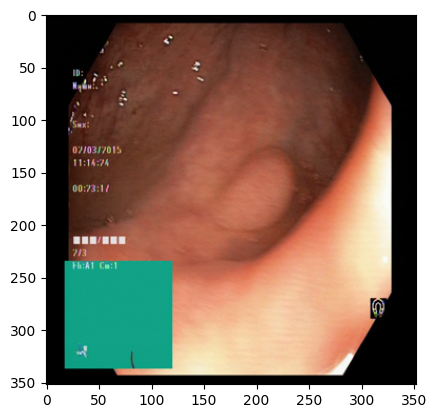

In [55]:
plt.imshow(image)
plt.imshow(mask)

In [ ]:
import deeplake
ds = deeplake.load('hub://jasonadrianzoom/colonoscopy')

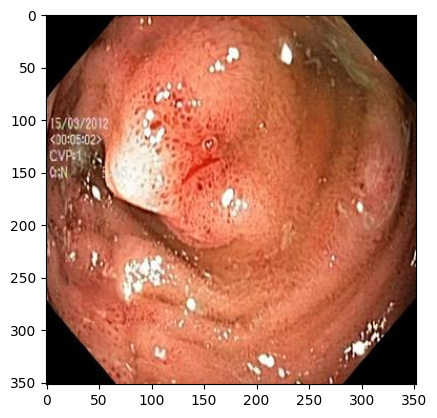

In [16]:
img = ds.images[0].numpy() 
mask_img = ds.masks[0].numpy()

plt.imshow(img)